In [1]:
using DiffGrating1D
using Plots; gr()
using LinearAlgebra
using JLD
using Interpolations

┌ Info: 
│   α = 0.245
└ @ Main /home/rodrigo/Dropbox (MIT)/mit/semesters/spring-2024/18.369 Methods in Nanophotonics/project/DiffGrating1D/examples/ex4/notebook.ipynb:4


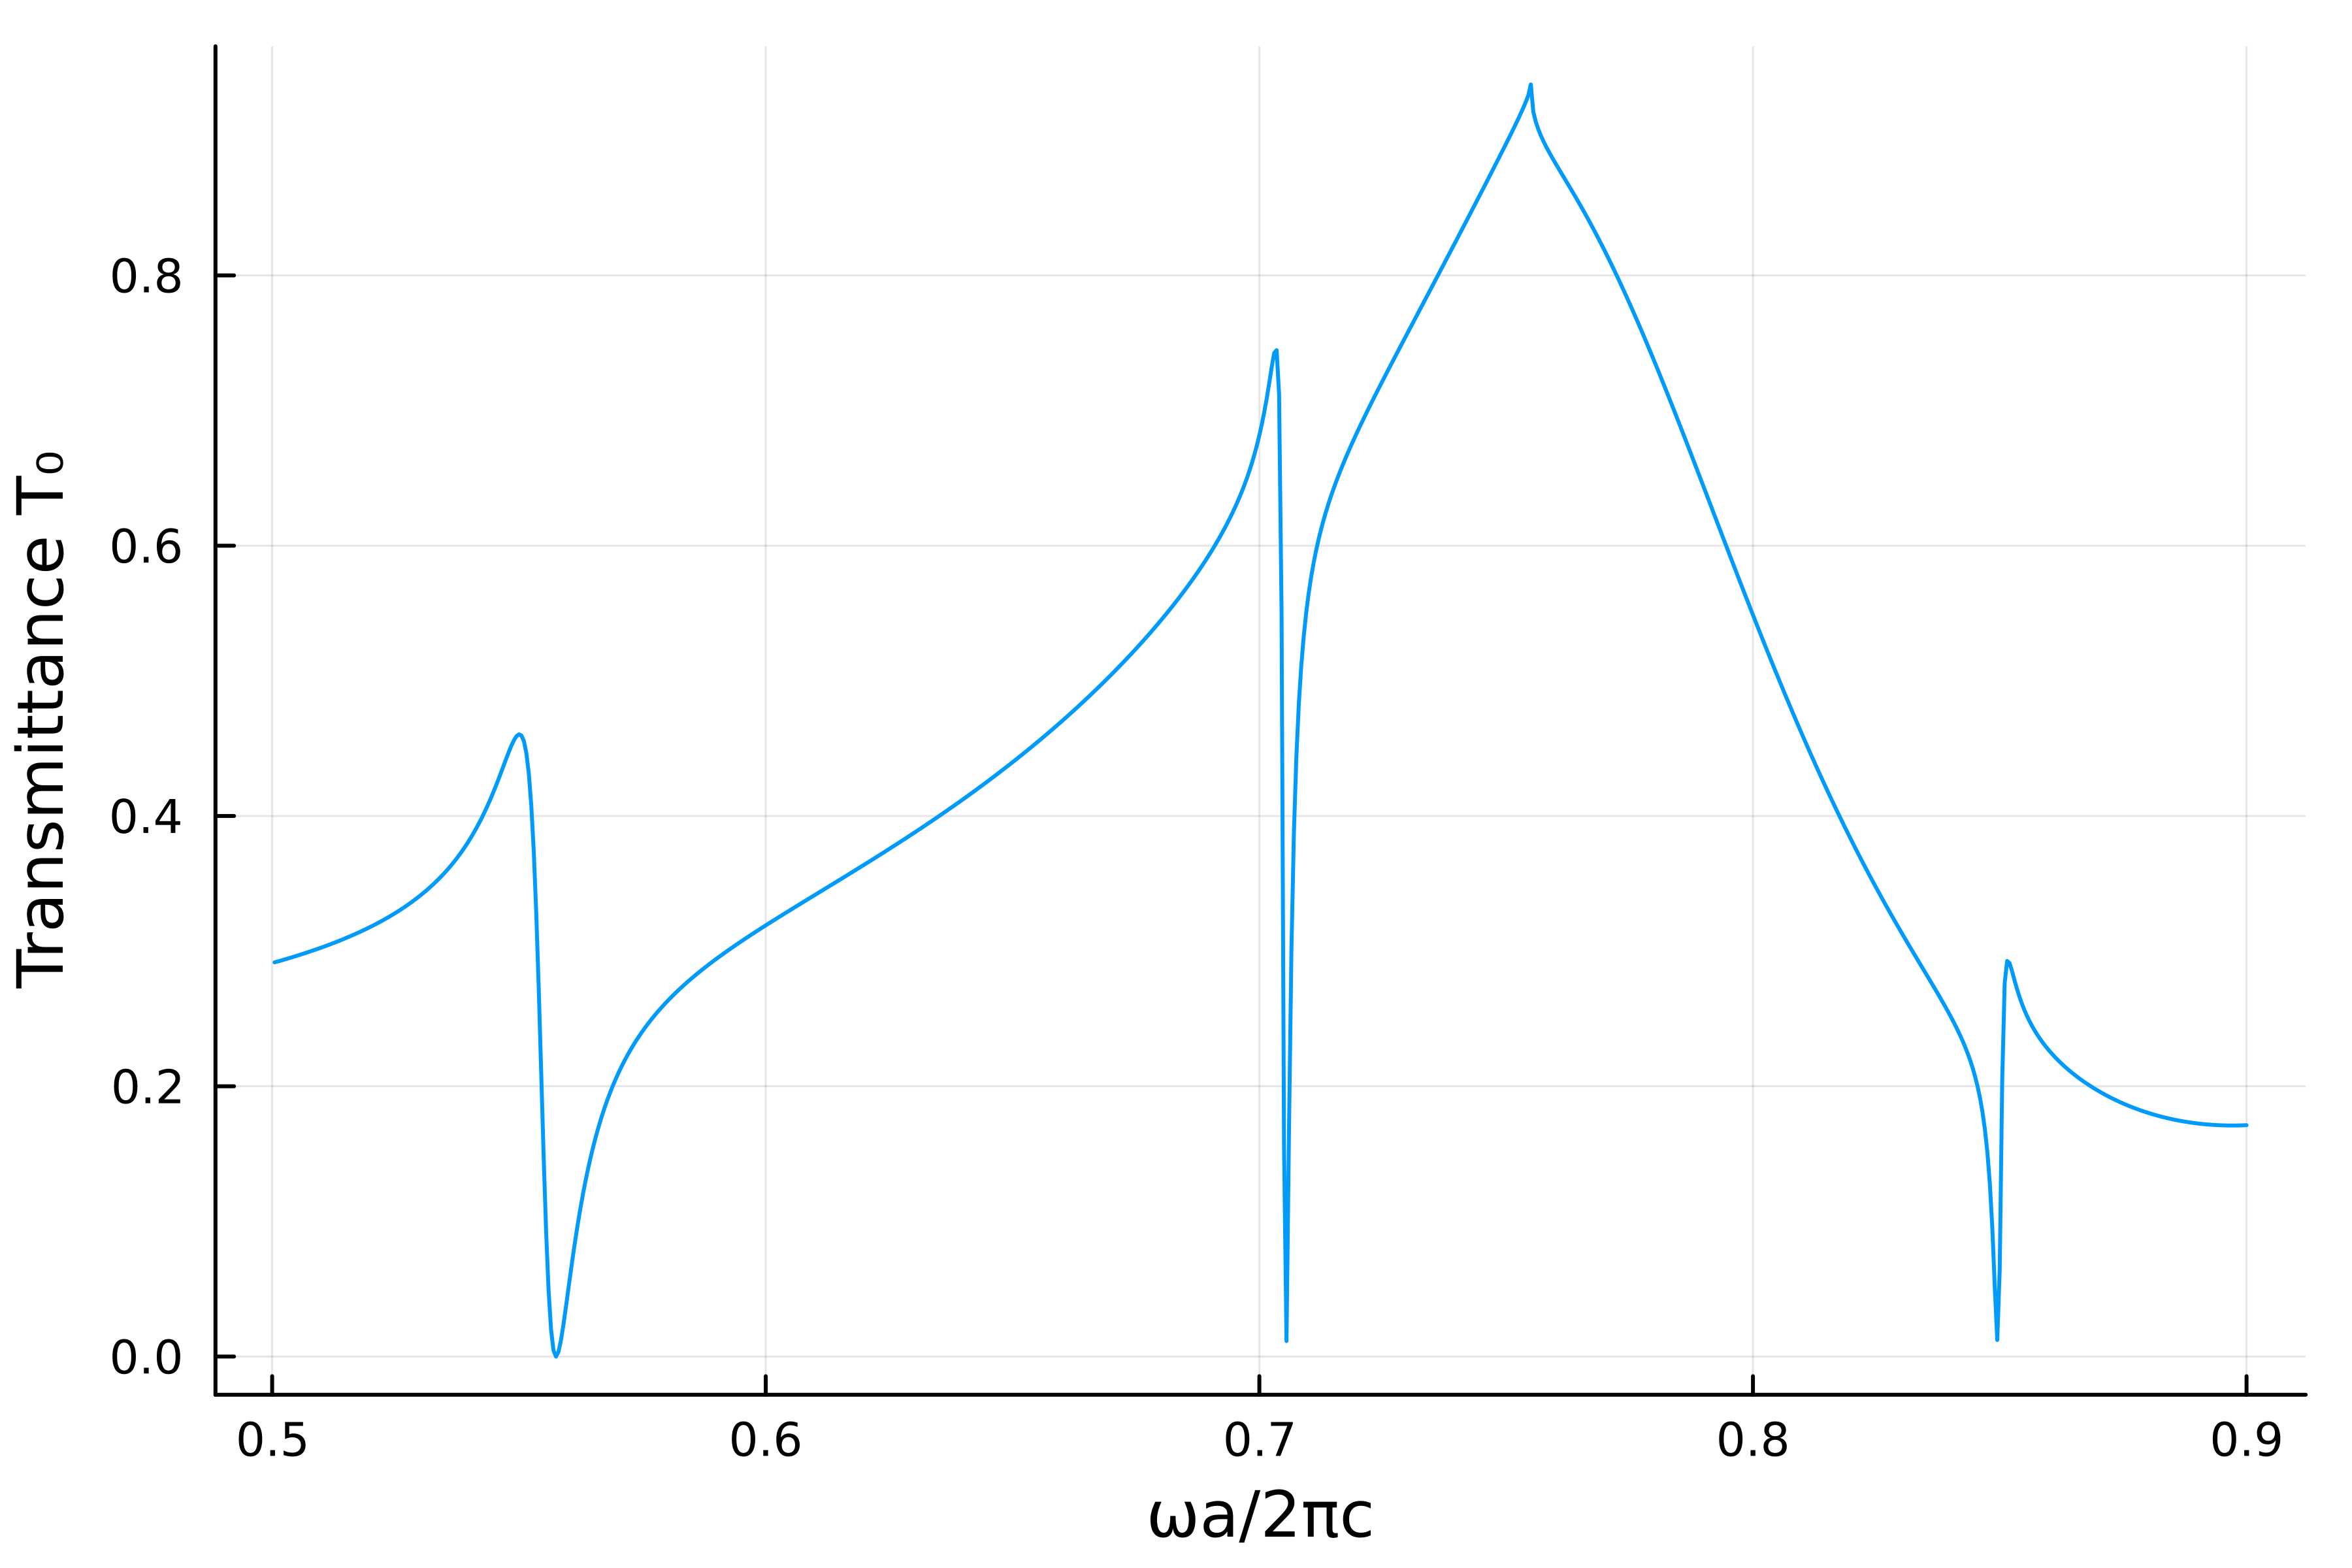

In [13]:
## w_singlekx_T
data_file = "data_w_singlekx_T.jld"
@load data_file α wLlist tlist
@info "" α
fig = plot(wLlist,tlist,xlabel="ωa/2πc",ylabel="Transmittance T₀",dpi=600,legend=false)
savefig("ex4_w_singlekx_T.pdf")
plot(fig)

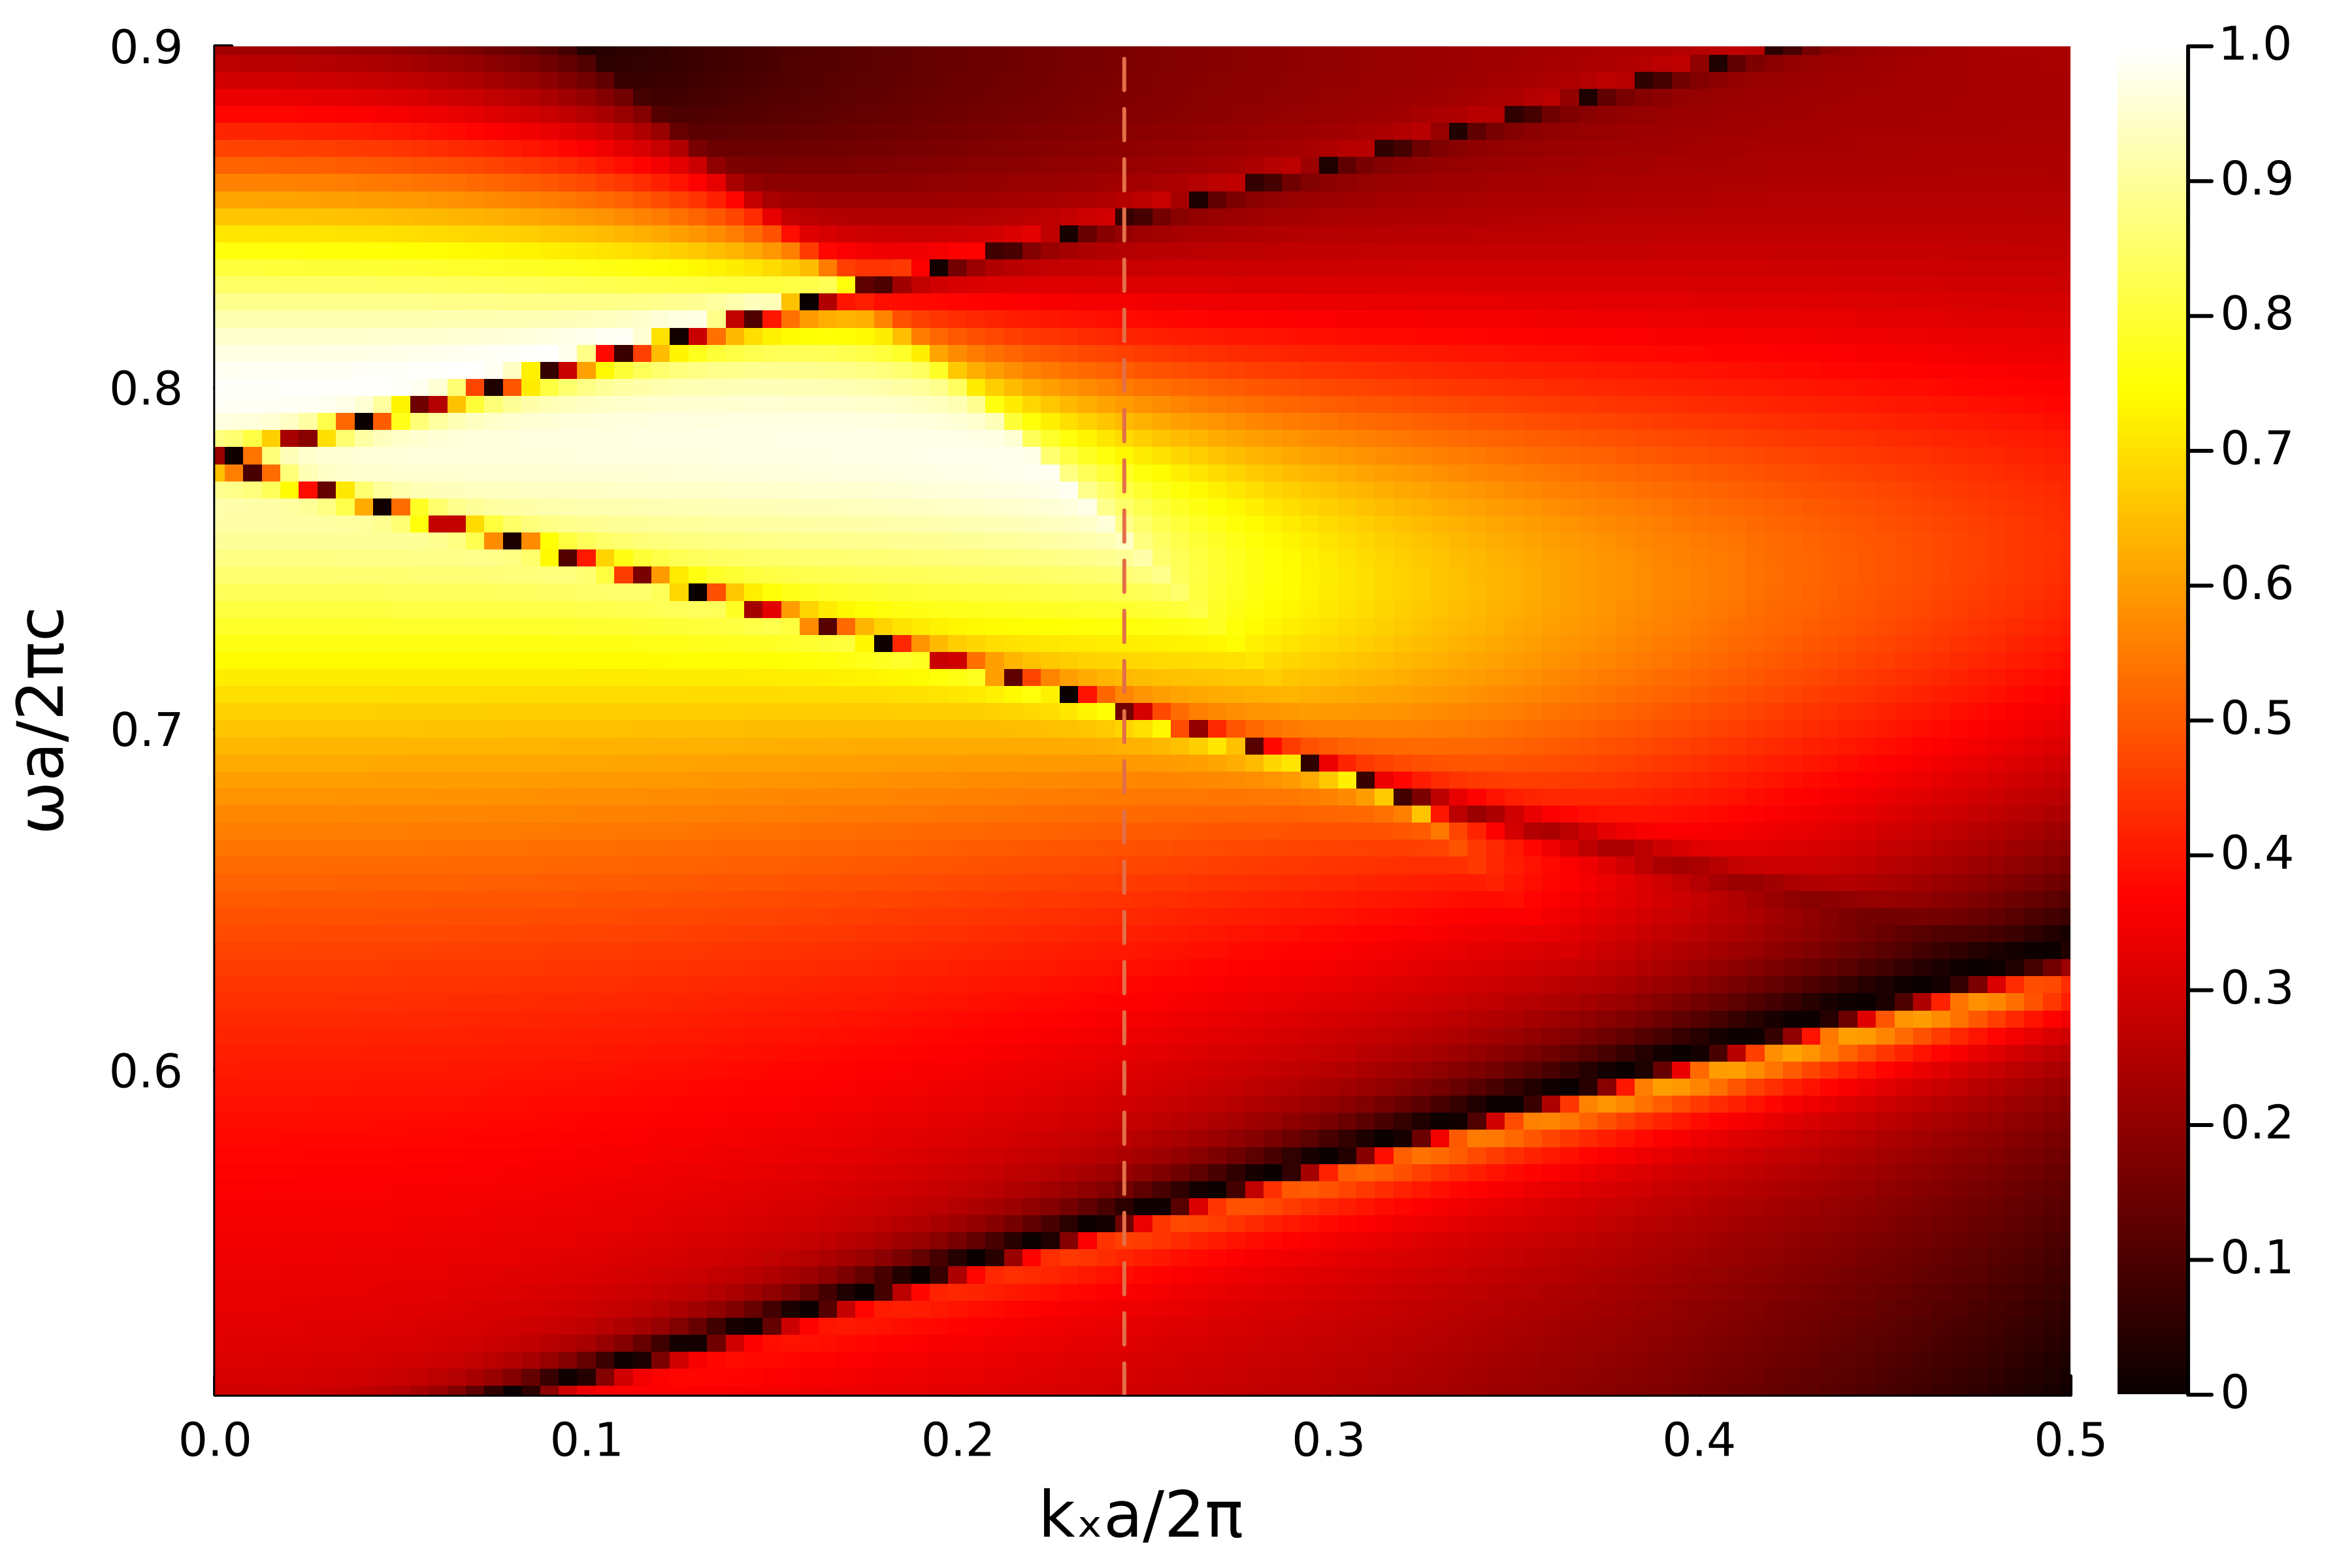

In [18]:
## w_kx_T w ∈ (0.5,0.9)
data_file = "data_w_kx_T.jld"
dh = 0.005 # step in both w̃ and α̃
@load data_file αlist wLlist tlist
fig = heatmap(αlist,wLlist,transpose(tlist),dpi=600,grid=false,xlabel="kₓa/2π",ylabel="ωa/2πc",c=:hot,clims=(0,1))
xlims!(0.0,0.5)
ylims!(0.5+dh,0.9)
vline!([α],ls=:dash,legend=false) # α of single_kx plot
savefig("ex4_w_kx_T_v1.pdf")
plot(fig)

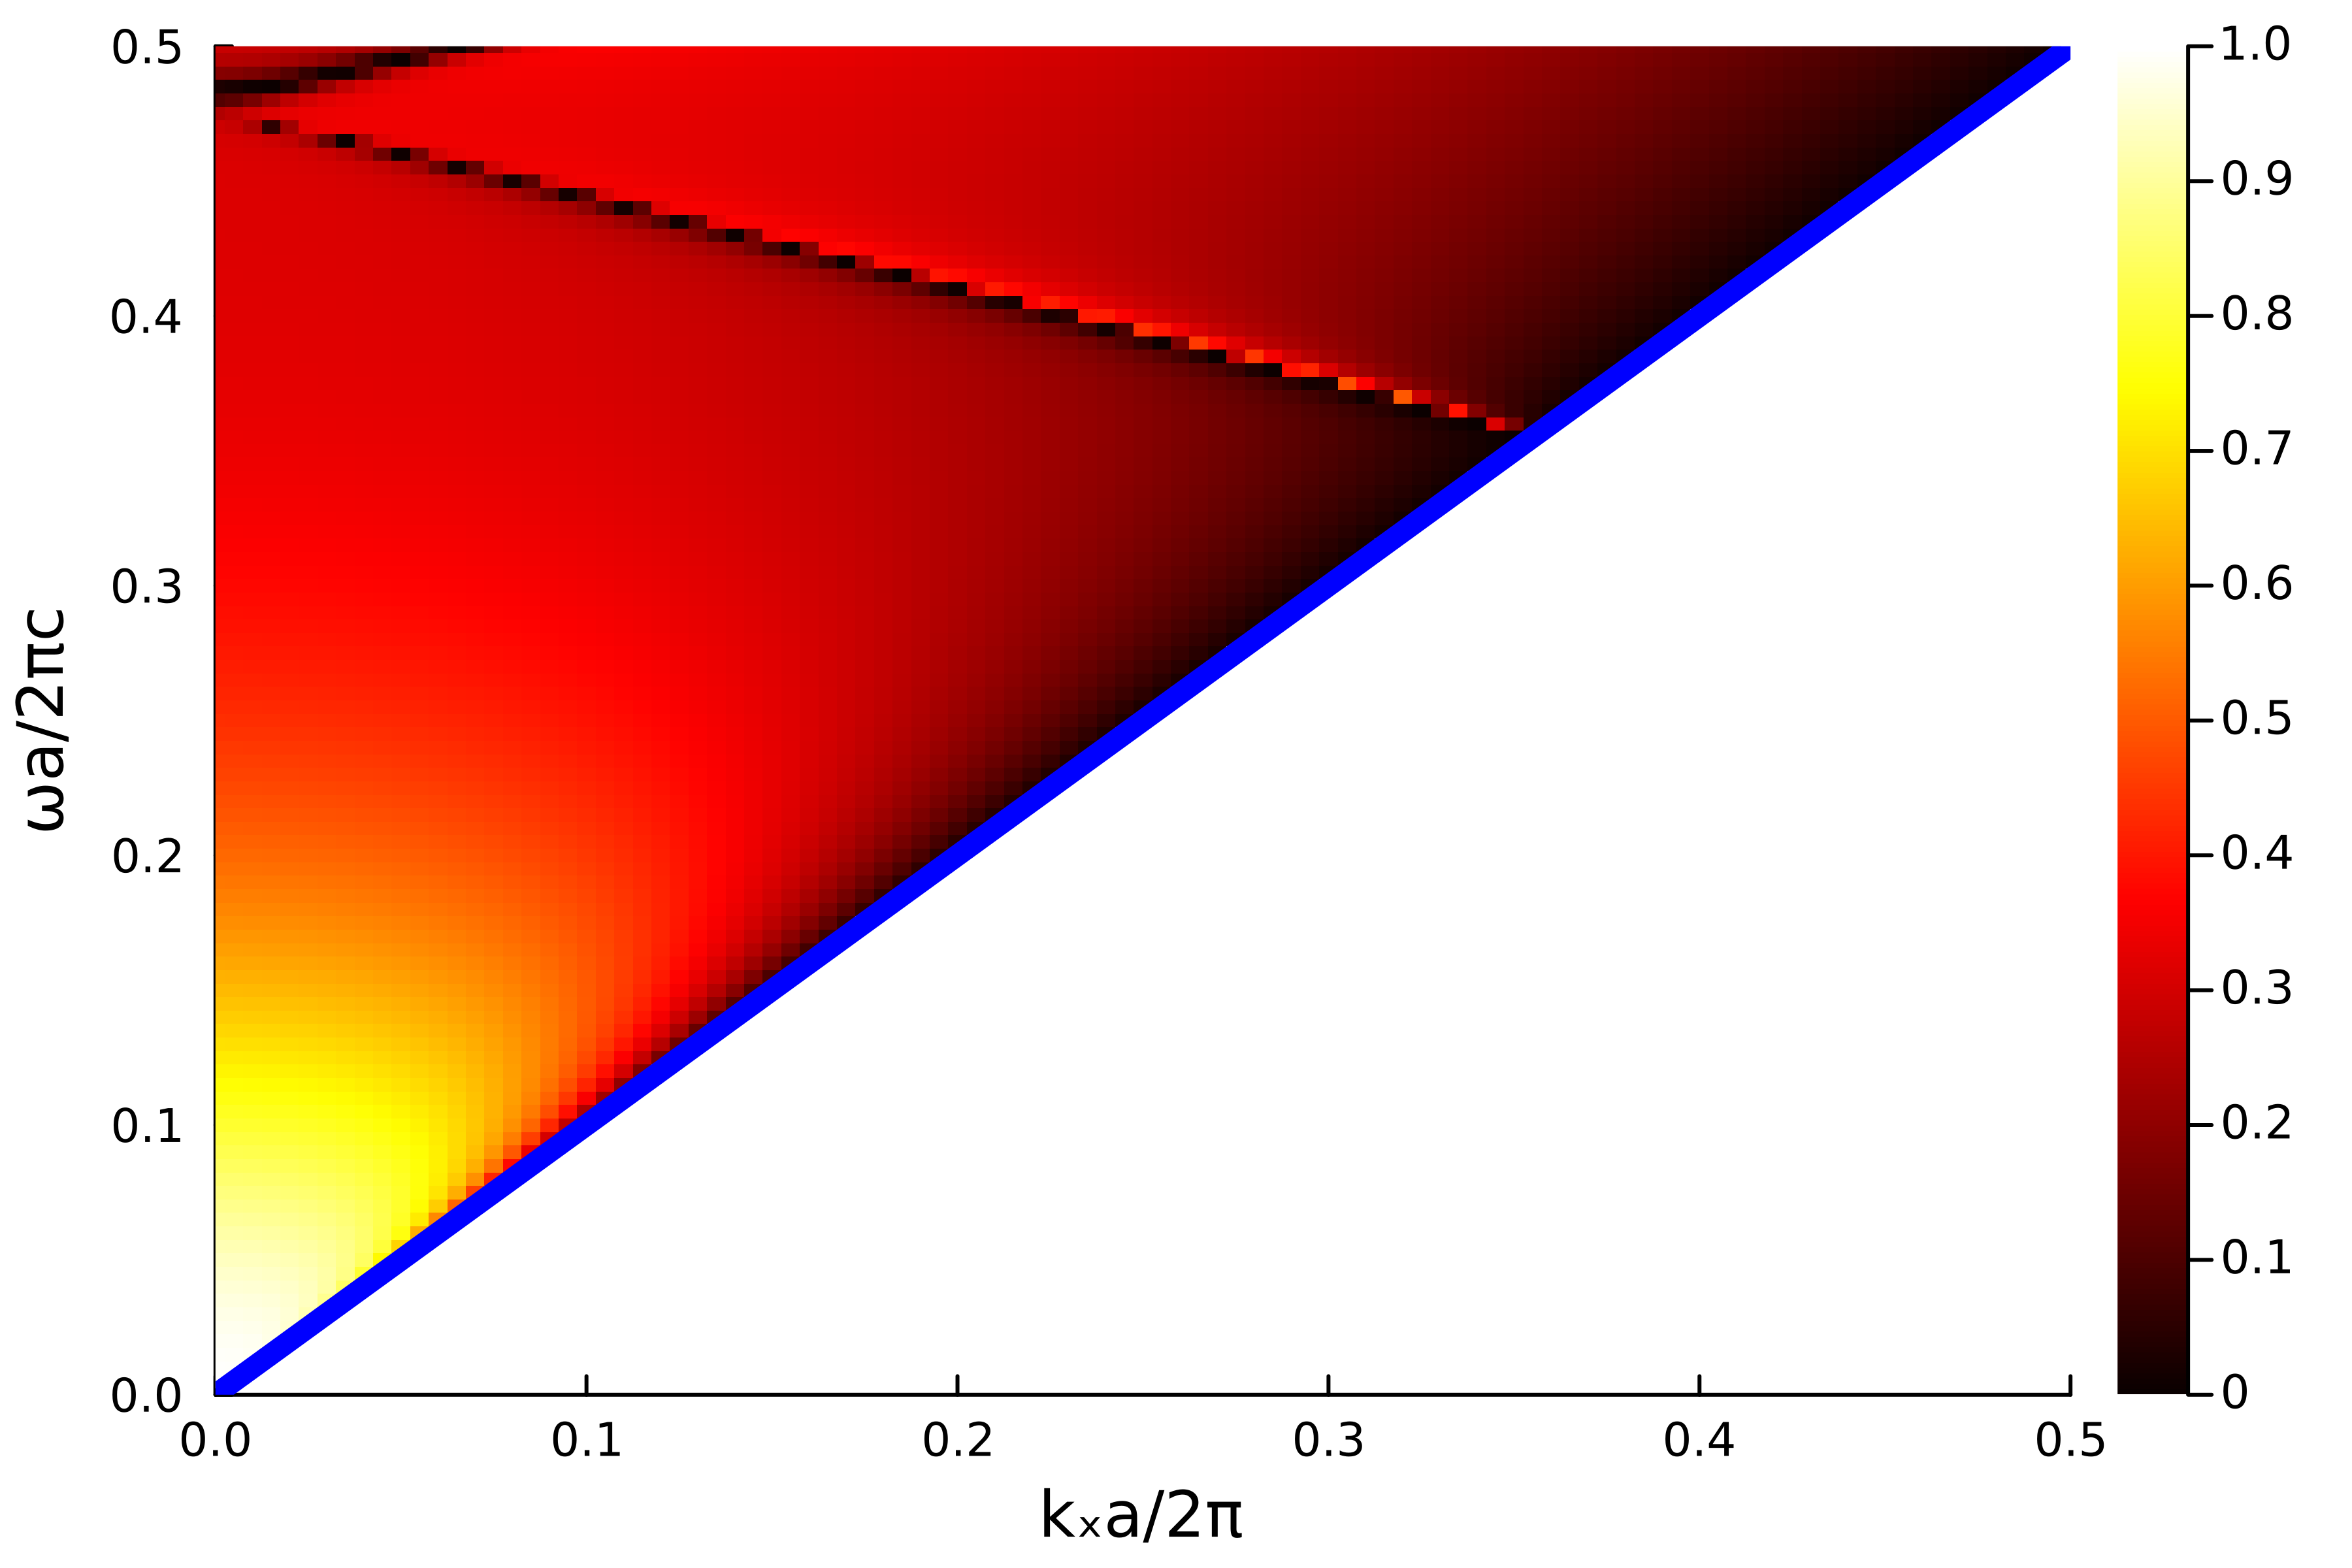

In [30]:
## w_kx_T w ∈ (0.0,0.5)
data_file = "data_w_kx_T_v2.jld"
dh = 0.005 # step in both w̃ and α̃
@load data_file αlist wLlist tlist
fig = heatmap(αlist,wLlist,transpose(tlist),dpi=600,grid=false,xlabel="kₓa/2π",ylabel="ωa/2πc",c=:hot,clims=(0,1))
xlims!(0.0,0.5)
ylims!(0.0,0.5)
plot!(αlist,αlist,color=:blue,lw=5.5,legend=false)  # light line
savefig("ex4_w_kx_T_v2.pdf")
plot(fig)

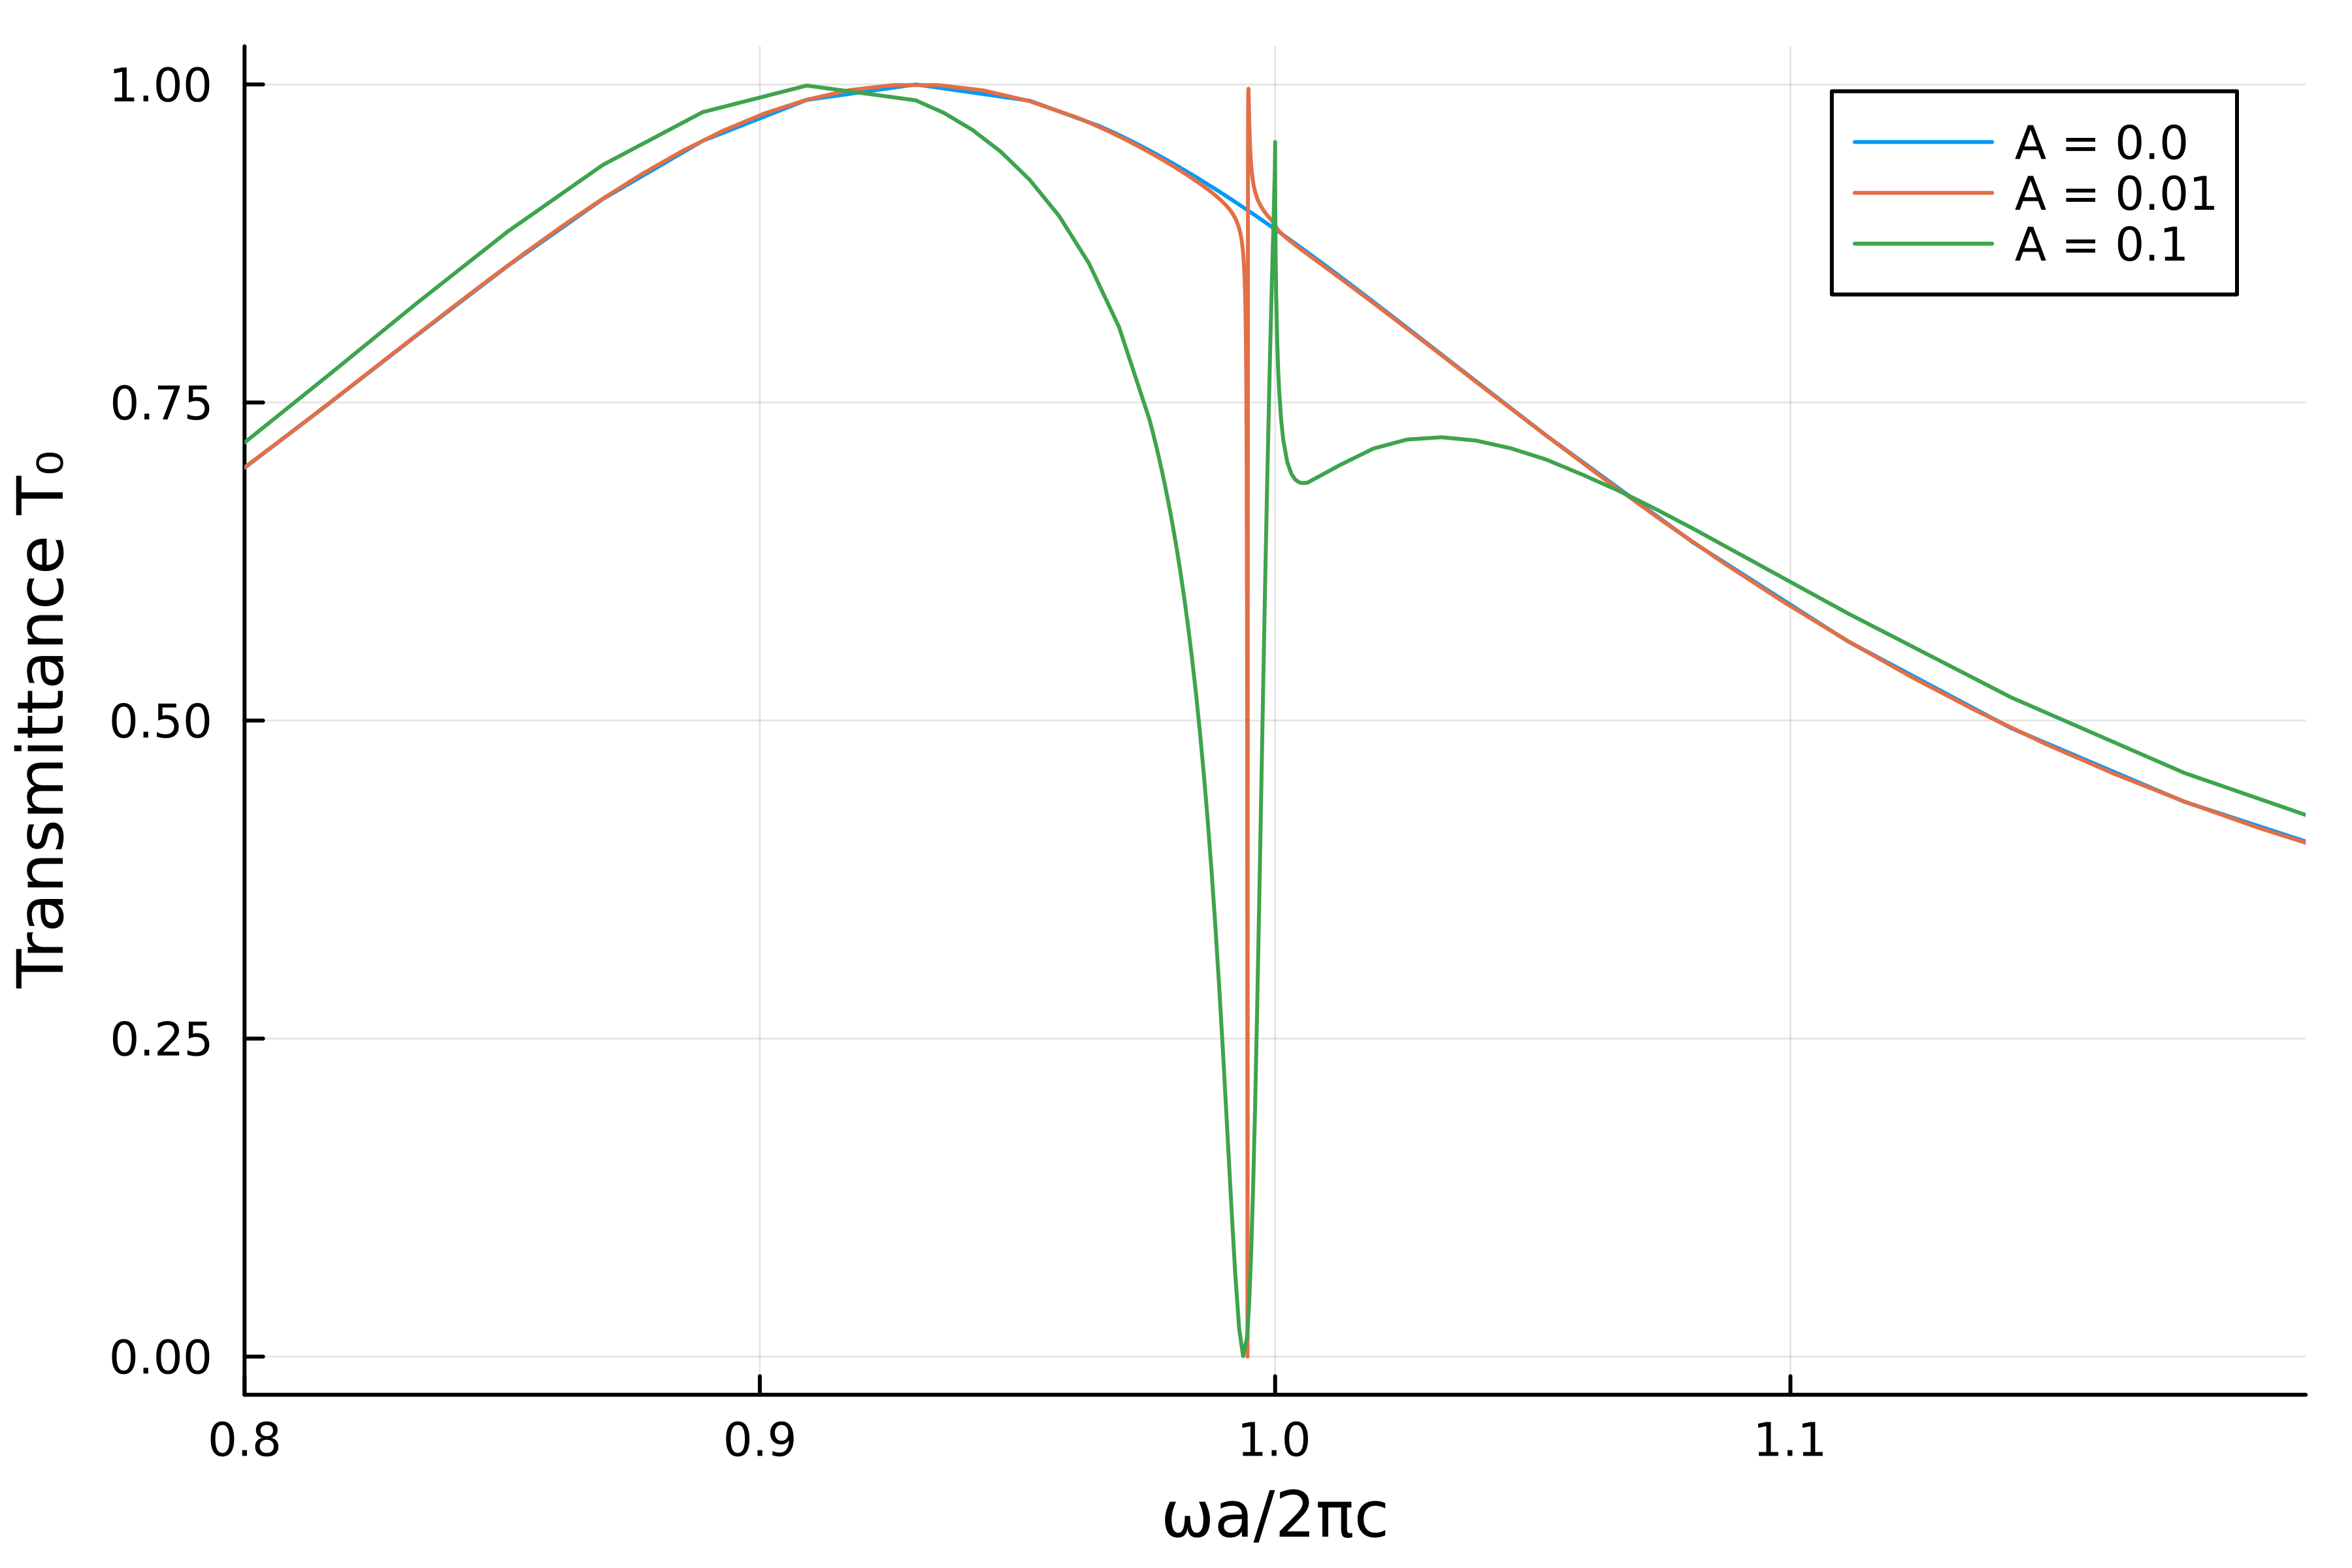

In [53]:
## Fano resonance
data_file = "data1.jld"
@load data_file data
data_keys = [0.0,0.01,0.1]
fig = plot(xlabel="ωa/2πc",ylabel="Transmittance T₀",dpi=600)
for A in data_keys
    λlist,t0list = data[A]
    perm = sortperm(λlist)
    λlist = λlist[perm]
    wlist = @. 1/λlist
    t0list = t0list[perm]
    # construct interpolant
    itp = interpolate((λlist,), real.(t0list), Gridded(Linear()))
    plot!(wlist,itp.(λlist),label="A = $A")
end
xlims!(0.8,1.2)
savefig("ex4_fano_v1.pdf")
plot(fig)

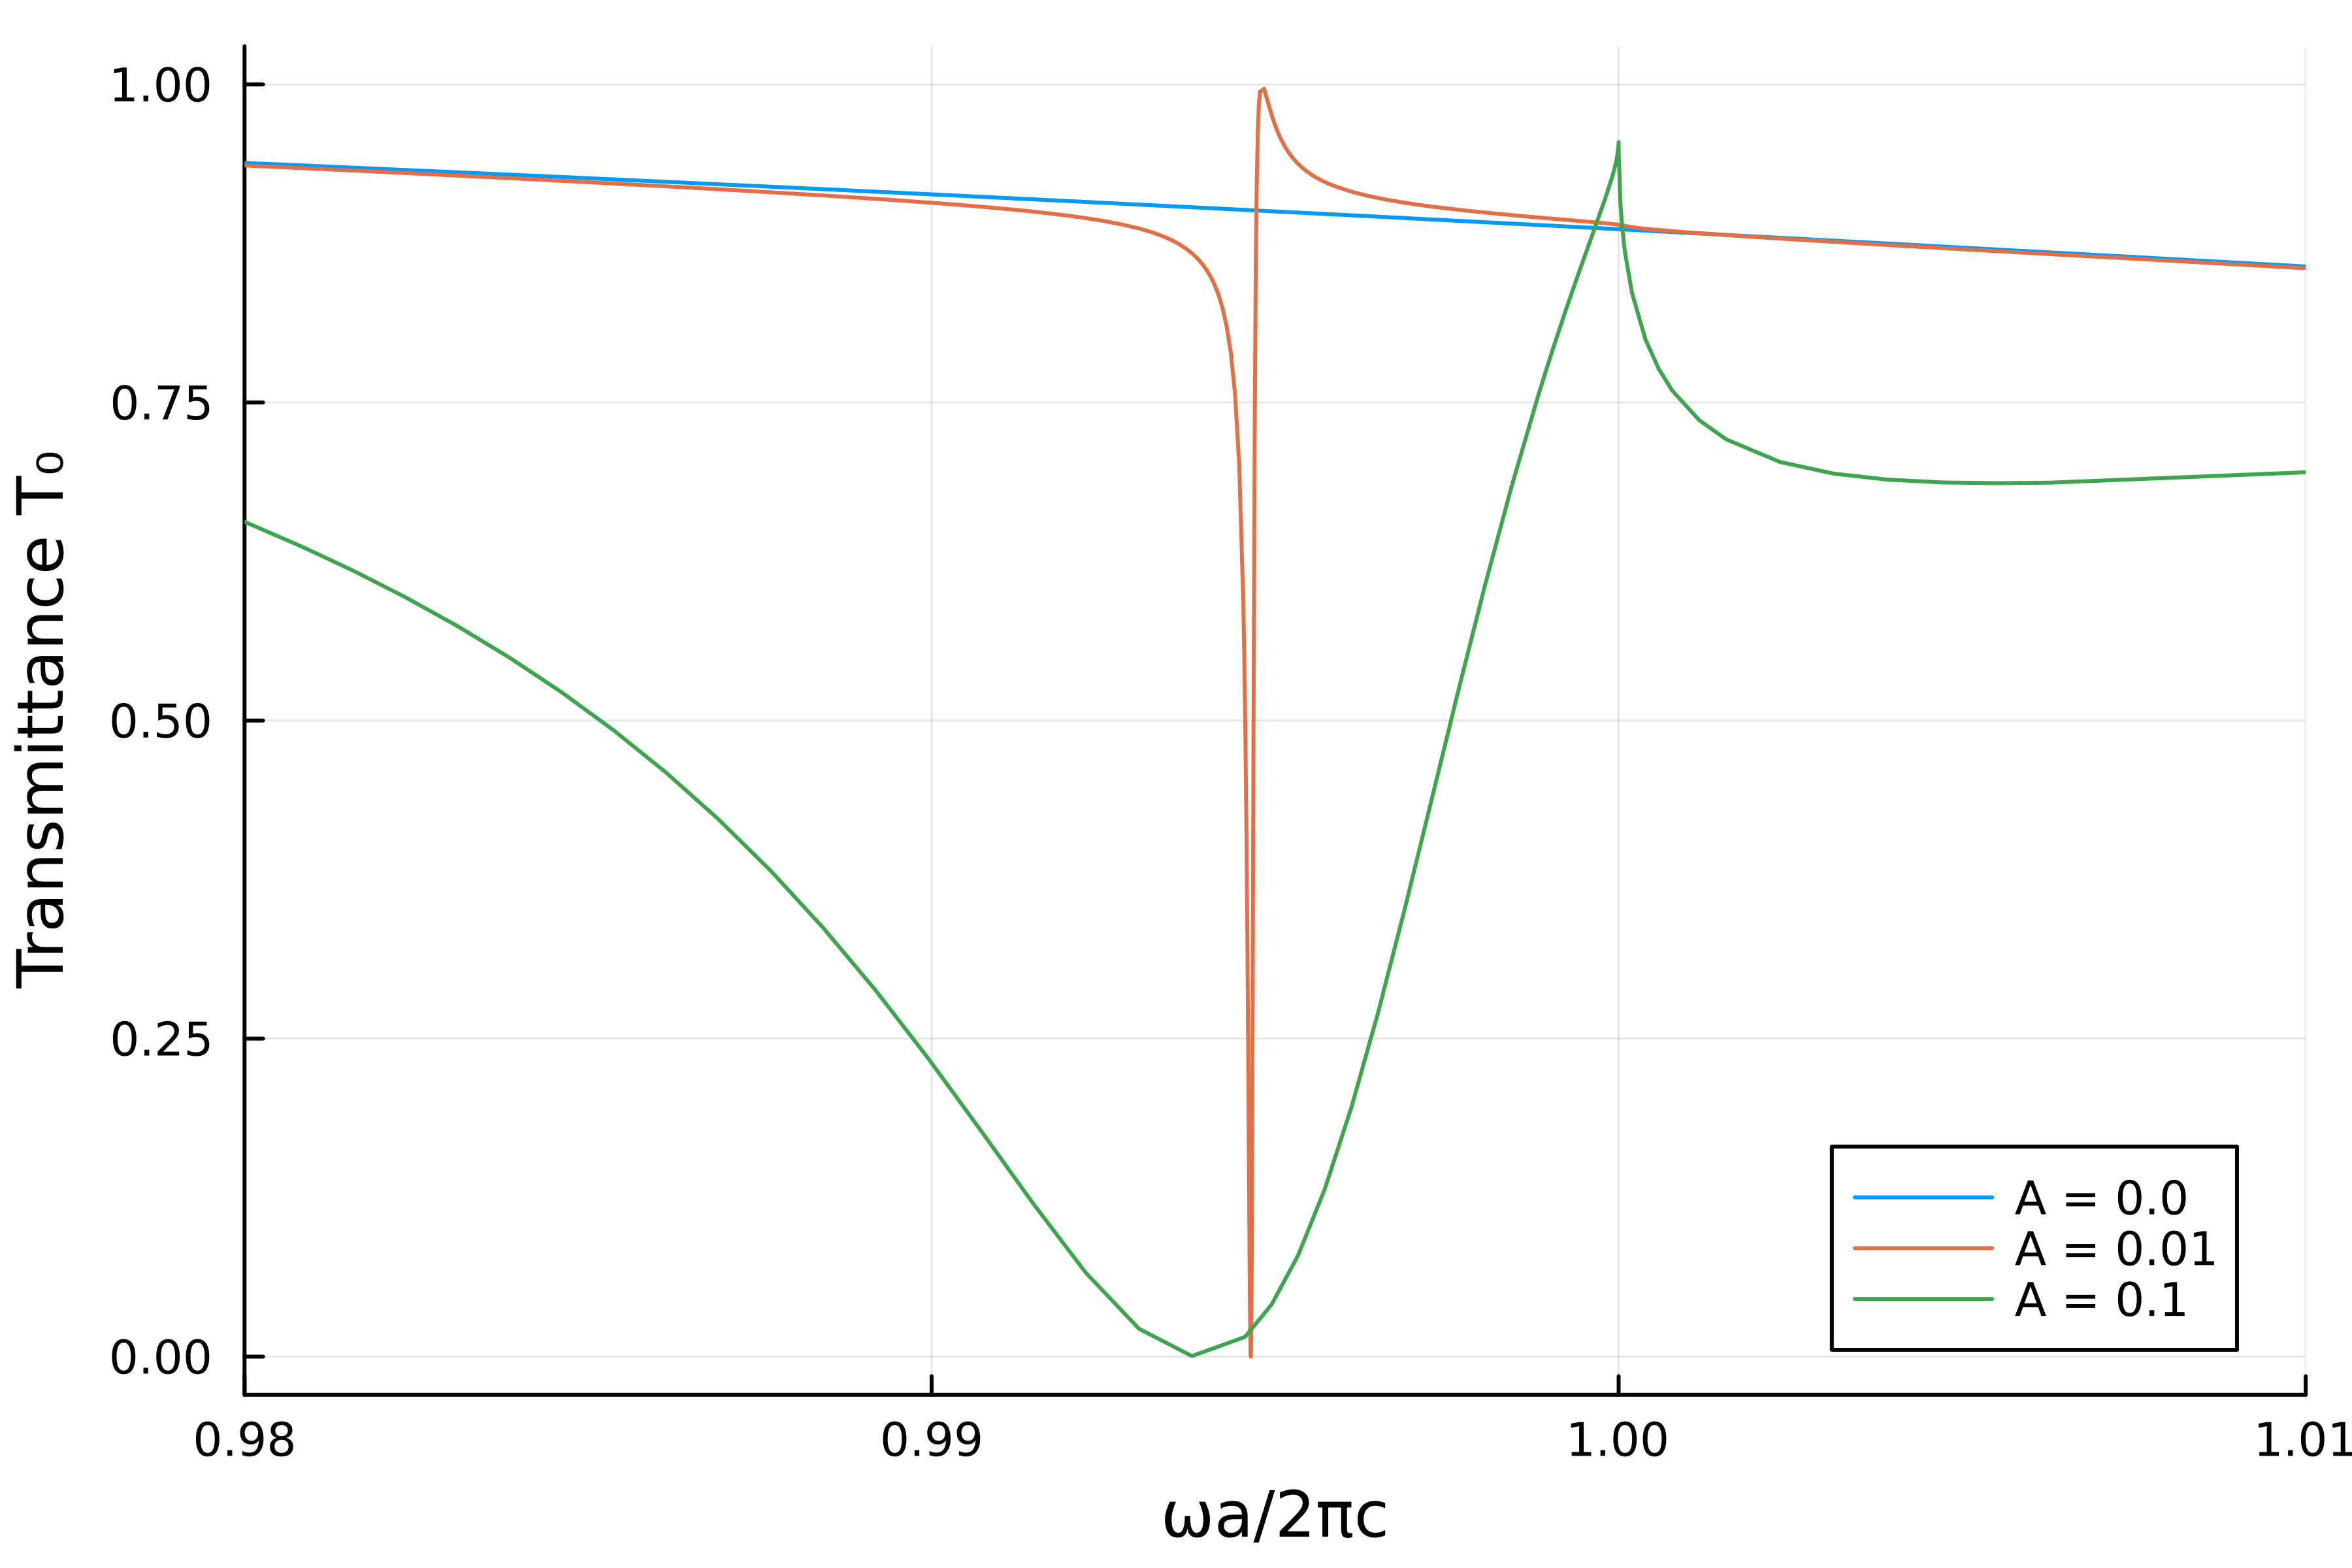

In [54]:
xlims!(fig,0.98,1.01)
savefig("ex4_fano_v2.pdf")
plot(fig)

In [57]:
# Exact transmittance
n1 = 1
n2 = sqrt(11.4)
n3 = 1
r12 = (n1-n2)/(n1+n2)
r23 = (n2-n3)/(n2+n3)
t12 = 2*n1/(n1+n2)
t23 = 2*n2/(n2+n3)
L = 1
d = 0.8*L/π
d0 = 0.1*L/π
D = d0+d/2  # thickness
ϕ(λ) = 2π*D*n2/λ
t(λ) = t12*t23*exp(-im*ϕ(λ))/(1+r12*r23*exp(-im*2*ϕ(λ)))
T(λ) = abs2(t(λ))
Tw(w) = T(1/w)

Tw (generic function with 1 method)

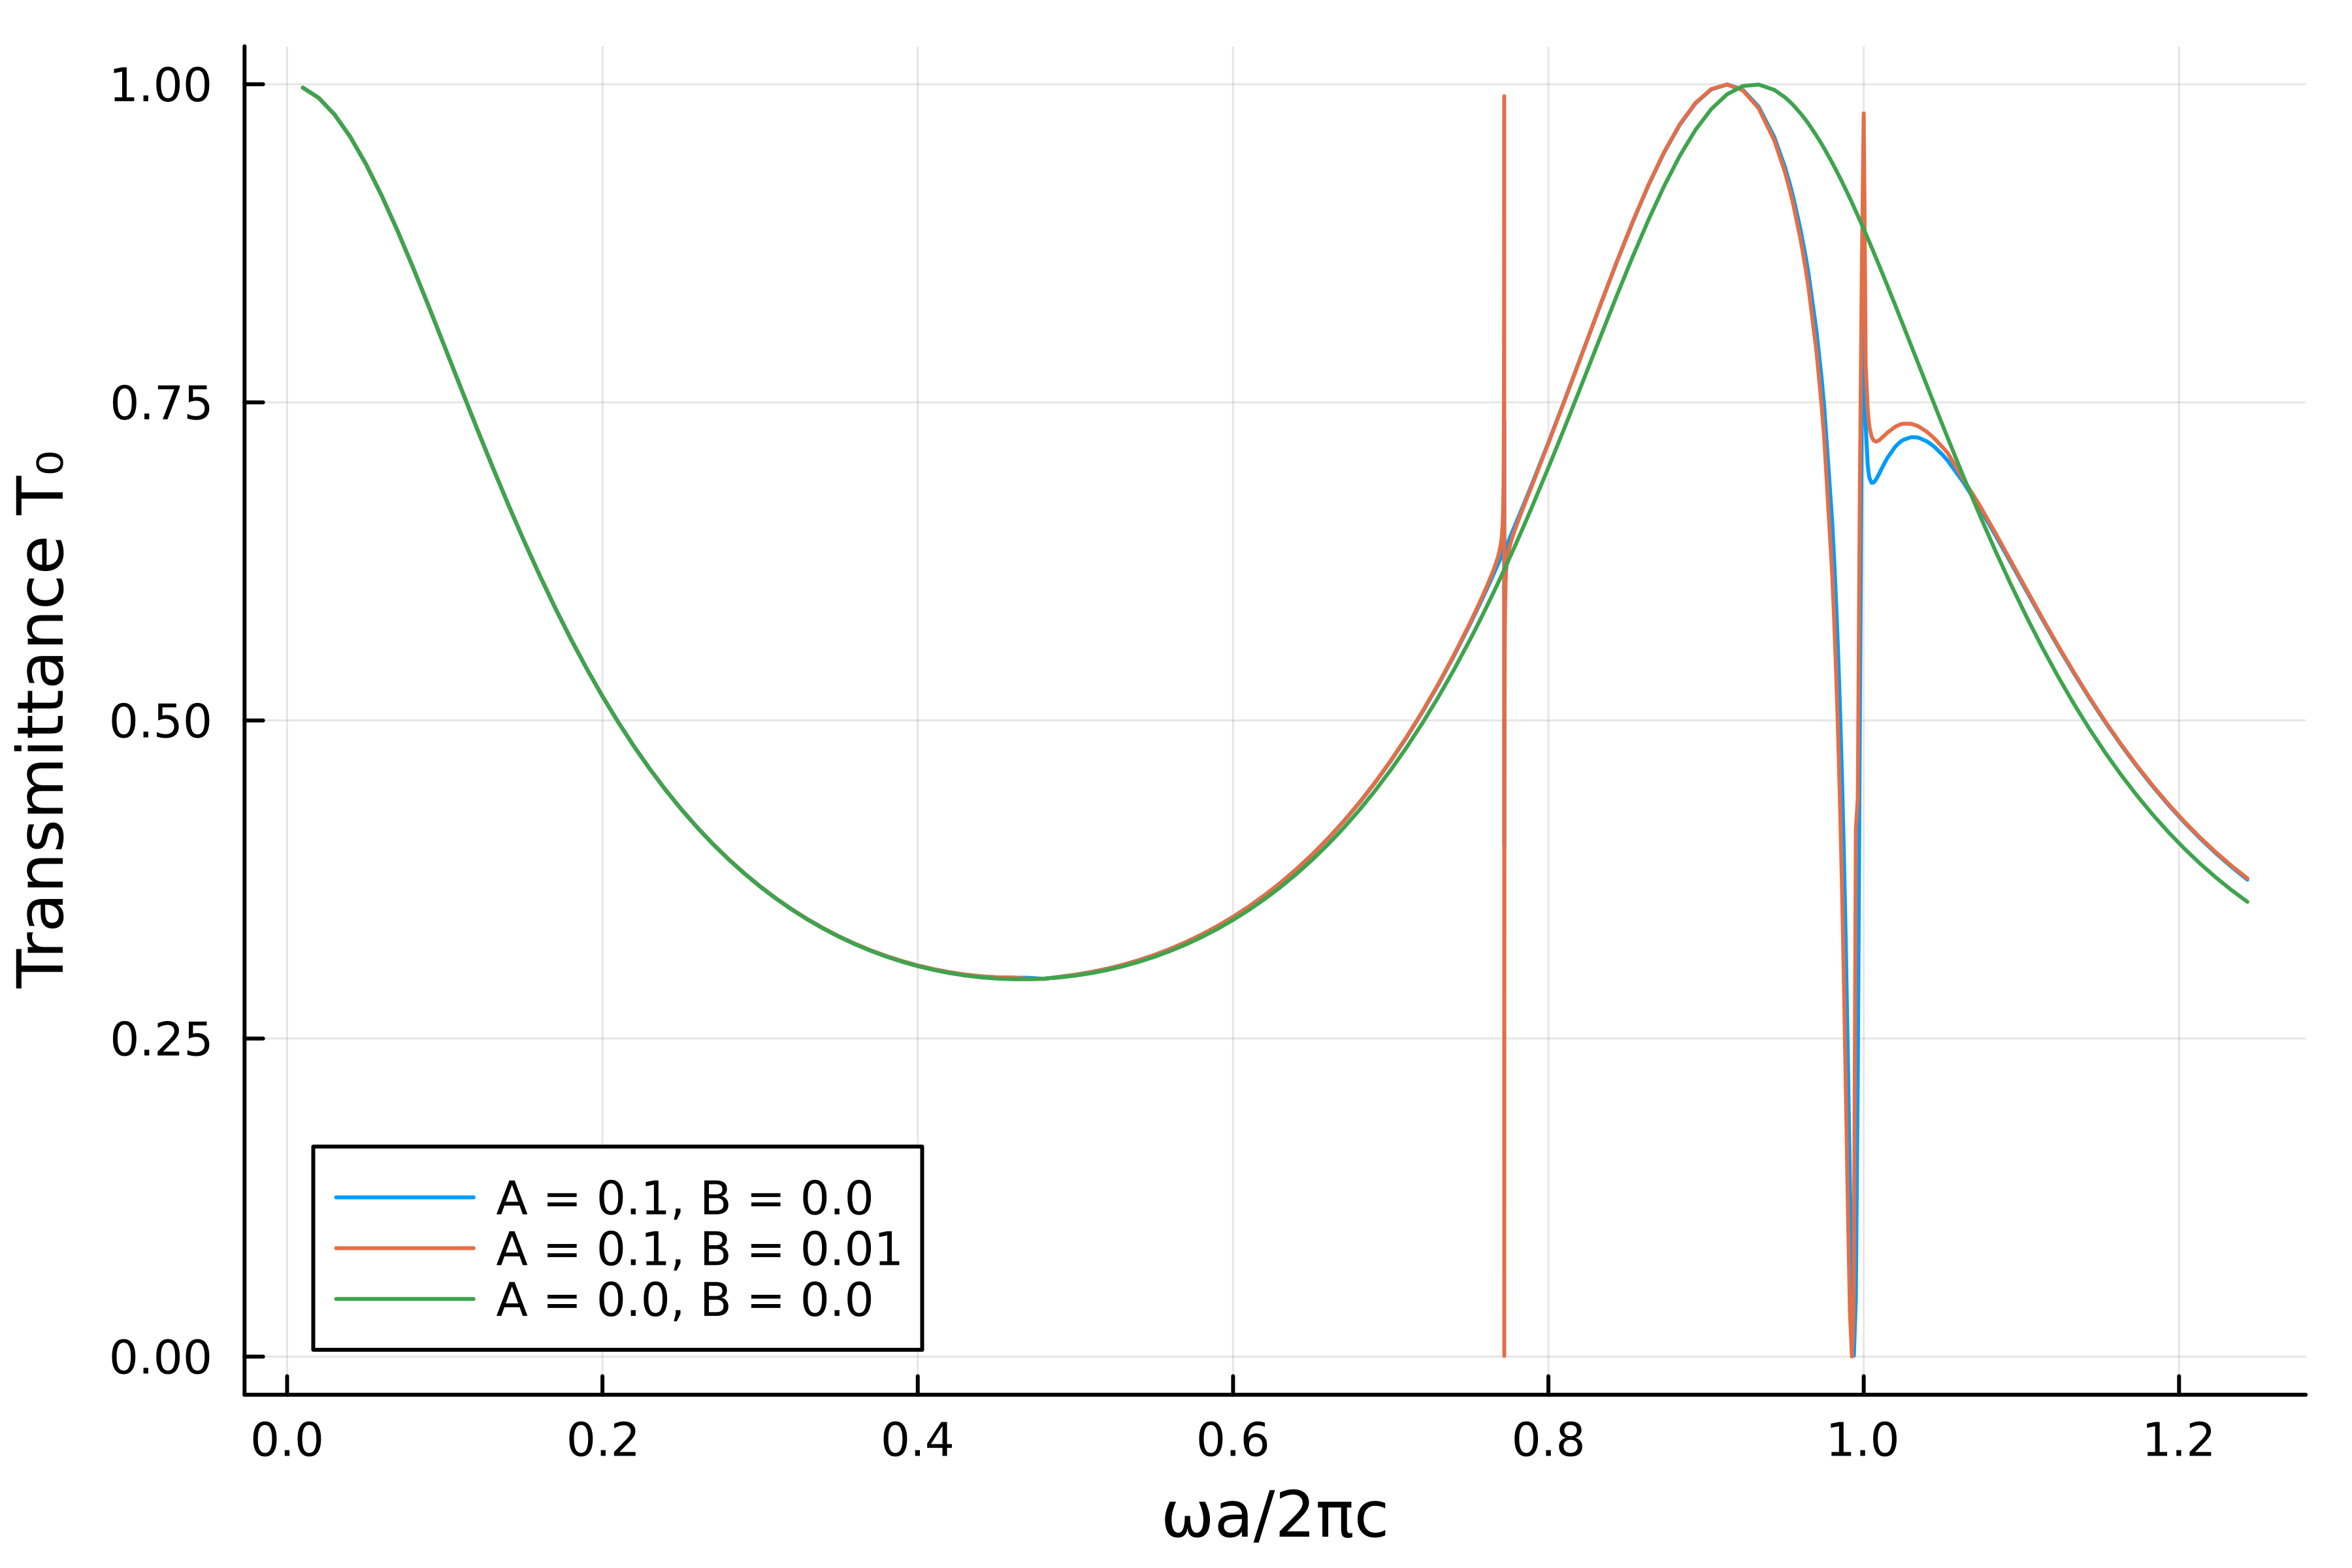

In [59]:
## BiC
data_file = "data_bic.jld"
@load data_file data
Afrac = 0.1
data_keys = [0.0,0.01]
fig = plot(xlabel="ωa/2πc",ylabel="Transmittance T₀",dpi=600)
for B in data_keys
    wLlist,t0list = data[B]
    perm = sortperm(wLlist)
    wLlist = wLlist[perm]
    t0list = t0list[perm]
    # construct interpolant
    itp = interpolate((wLlist,), real.(t0list), Gridded(Linear()))
    plot!(wLlist,itp.(wLlist),label="A = $Afrac, B = $B")
end
# A = 0
wLlist0,_ = data[0.0]
wLlist0 = sort(wLlist0)
plot!(wLlist0,Tw.(wLlist0),label="A = 0.0, B = 0.0")
#xlims!(fig,0.98,1.01)
savefig("ex4_bic_v1.pdf")
plot(fig)

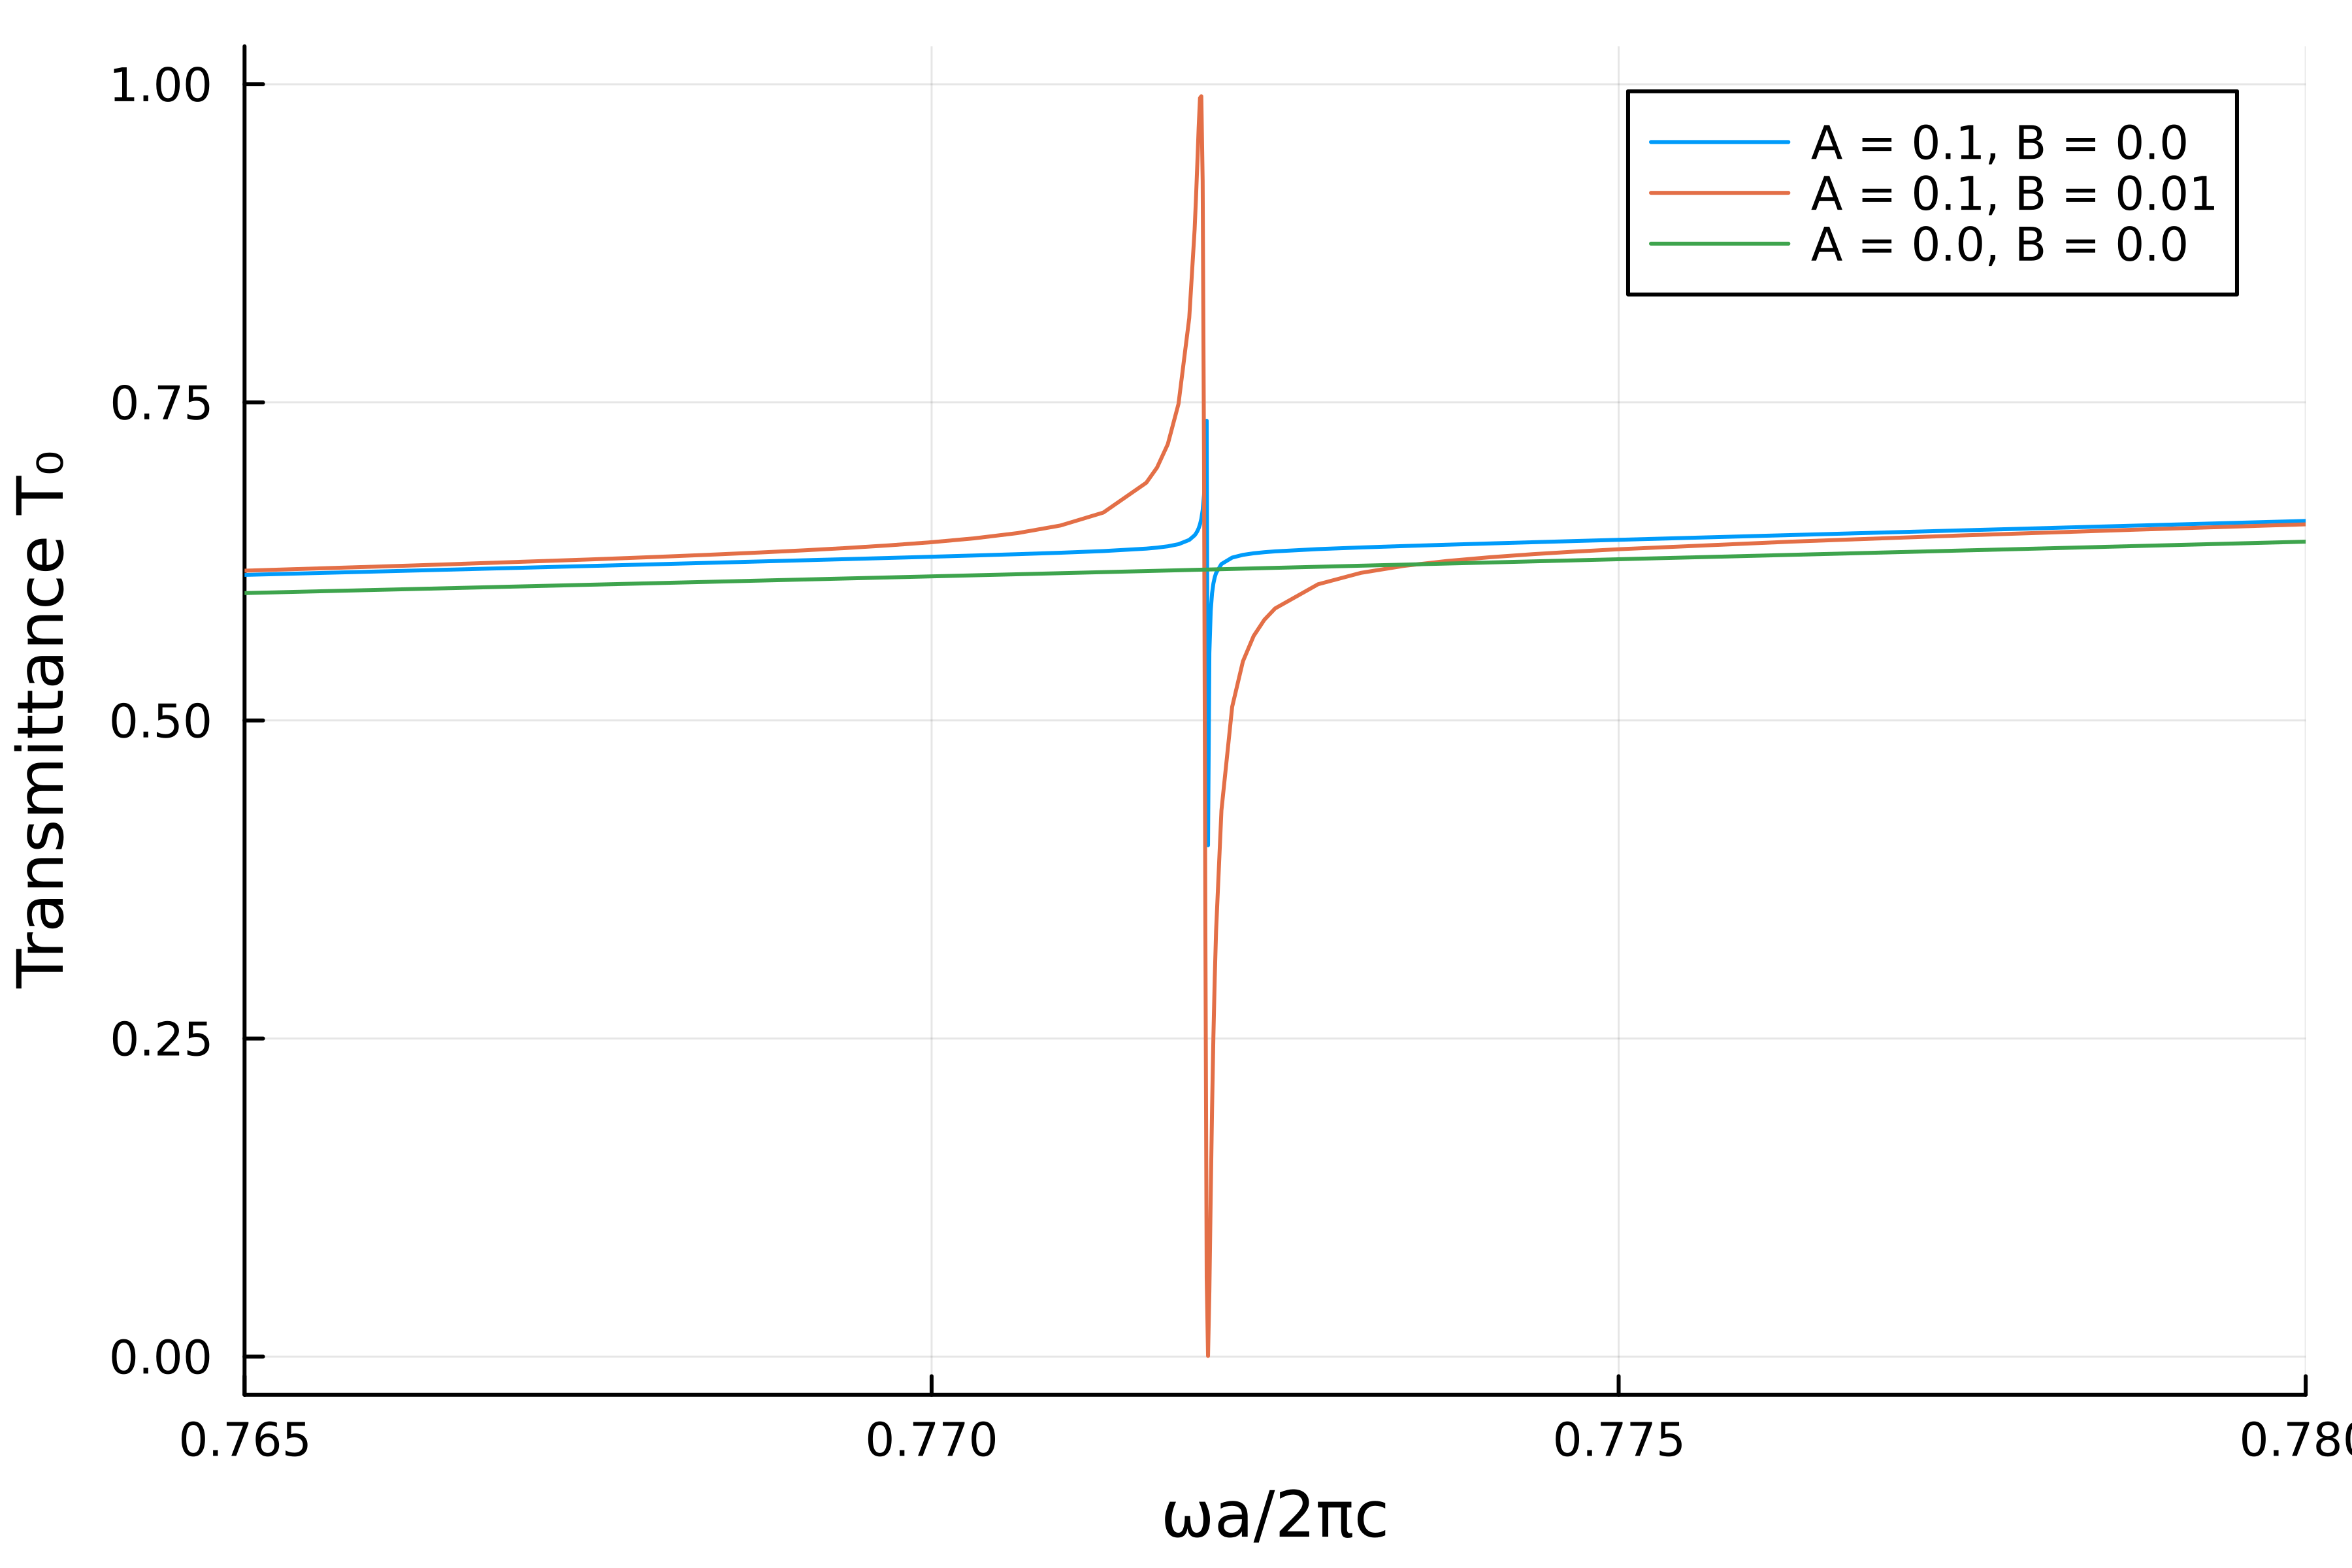

In [62]:
xlims!(fig,0.765,0.78)
savefig("ex4_bic_v2.pdf")
plot(fig)

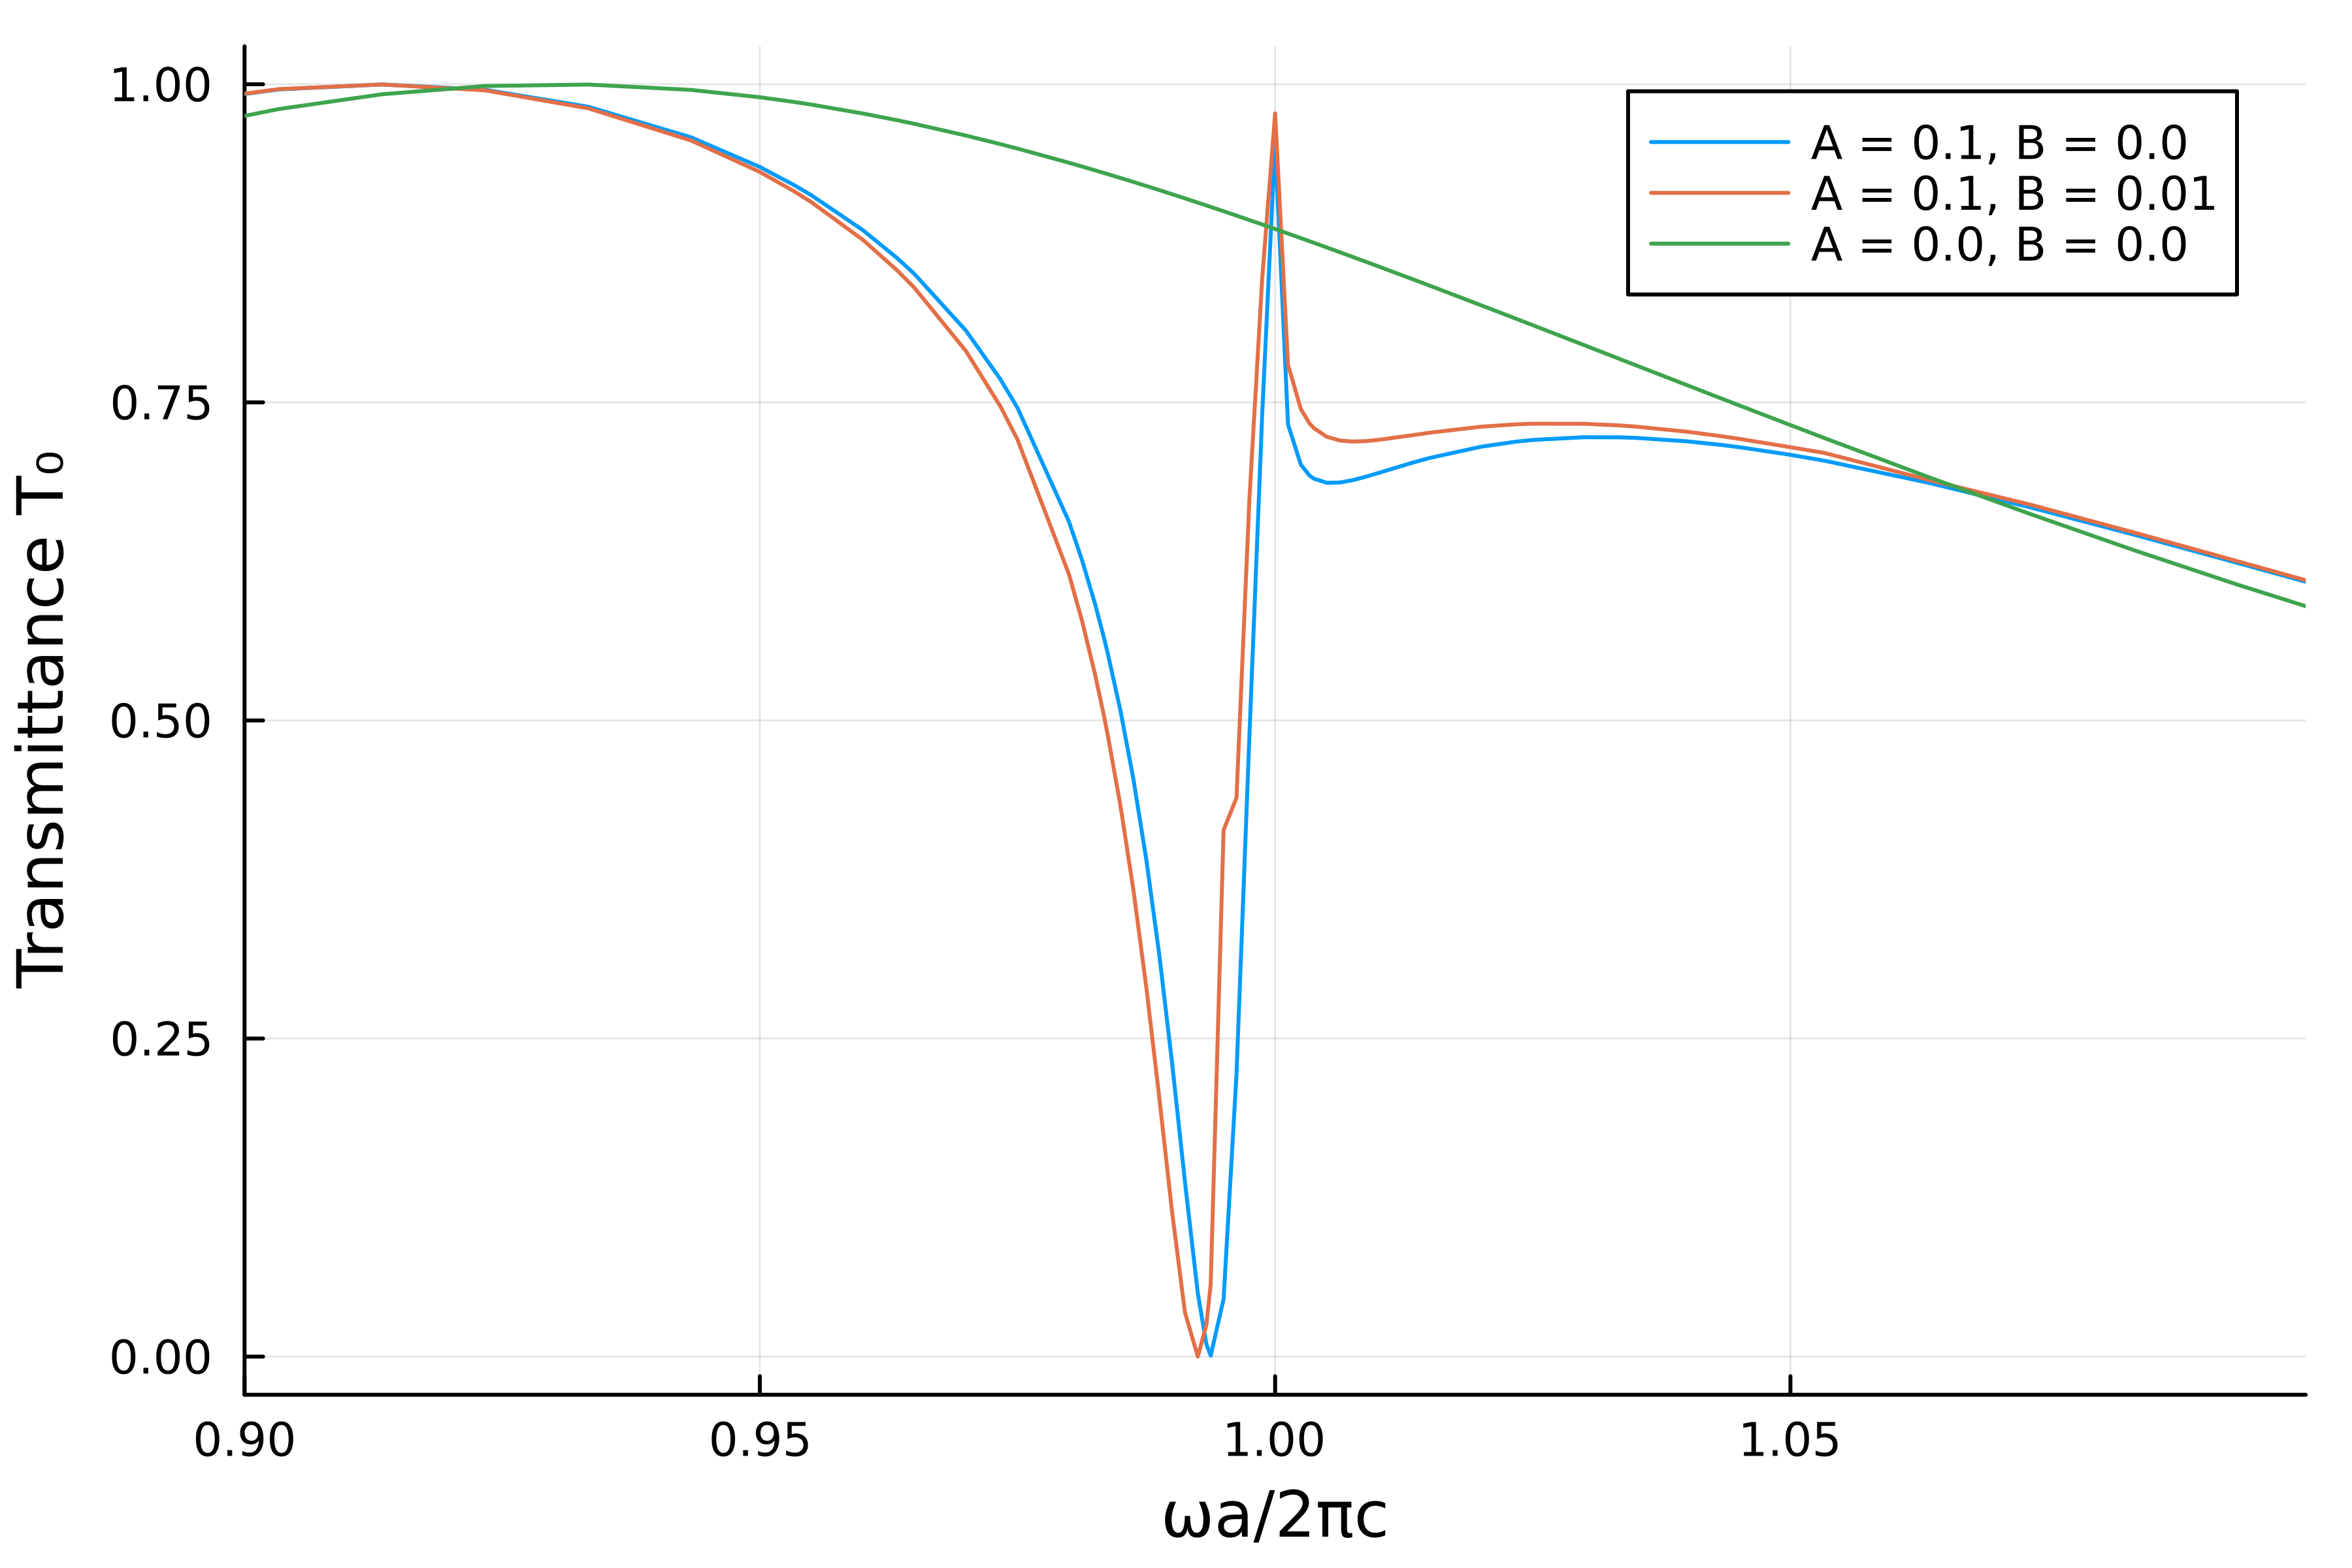

In [64]:
xlims!(fig,0.9,1.1)
savefig("ex4_bic_v3.pdf")
plot(fig)